# INITIAL DATA INTERPRETATION WITH A CHUNK OF DATA

### The purpose of this notebook is to make a first data interpretation. I want to understand, treate and modified a chunk of data (3 months) in order to apply later all these changes in the whole dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
report= pd.read_csv('Data From Jan to April 2020.csv',thousands='.',parse_dates=['Time'])


In [5]:
report.sample(5)

,Time,Domain,Opportunities,Format Loads,Format Fill Rate,Impressions,Viewable Impressions,Viewability Measured Impressions,Viewability Rate,Fill Rate,...,Cost,Profit,Revenue,Profit Margin,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate
22745,2020-01-10,connexun.com,2,2,0.00%,0,0,0,NaN,0.00%,...,$0.00,$0.00,$0.00,0.00%,0,0.00%,0.00%,0.00%,0.00%,0.00%
108902,2020-02-16,sportnews.to,0,8,0.00%,0,0,0,NaN,0.00%,...,$0.00,$0.00,$0.00,0.00%,0,0.00%,0.00%,0.00%,0.00%,0.00%
218030,2020-03-31,prensa.com,"4,799,963","734,399",54.69%,"401,627","281,764","398,255",70.75%,8.37%,...,$242.55832,$363.83748,$606.3958,60.00%,"1,676",0.42%,86.16%,79.36%,73.57%,68.30%
5411,2020-01-03,lespetitescroixdejuparo.fr,5,2,0.00%,0,0,0,NaN,0.00%,...,$0.00,$0.00,$0.00,0.00%,0,0.00%,0.00%,0.00%,0.00%,0.00%
2354,2020-01-02,noticiahoje.net,"52,979","8,960",0.08%,7,6,7,85.71%,0.01%,...,$0.00504,$0.00756,$0.0126,60.00%,0,0.00%,71.43%,71.43%,71.43%,42.86%


In [6]:
report.shape

(222676, 22)

In [7]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222676 entries, 0 to 222675
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Time                              222676 non-null  datetime64[ns]
 1   Domain                            222584 non-null  object        
 2   Opportunities                     222676 non-null  object        
 3   Format Loads                      216957 non-null  object        
 4   Format Fill Rate                  216957 non-null  object        
 5   Impressions                       222676 non-null  object        
 6   Viewable Impressions              222676 non-null  object        
 7   Viewability Measured Impressions  222676 non-null  object        
 8   Viewability Rate                  107428 non-null  object        
 9   Fill Rate                         222676 non-null  object        
 10  Efficiency Rate                 

- I´ll drop the following columns because they don´t add value to the advertisers. Some of them are important only from the point of view of the Publisher or the agent. 

In [9]:
report.drop(['Opportunities','Viewable Impressions','Viewability Measured Impressions','Fill Rate','Cost','Profit','Revenue','Profit Margin'],axis=1, inplace=True)


In [10]:
# NANS values
report = report.fillna(0)

Converting numeric columns with ' , ' into integers

In [11]:
report['Format Loads'] = report['Format Loads'].str.replace(",", "").astype(float)
report['Impressions'] = report['Impressions'].str.replace(",", "").astype(int)
report['Clicks'] = report['Clicks'].str.replace(",", "").astype(int)


Converting columns with '%' , '$' and ',' into floats

In [12]:
report['Format Fill Rate'] = report['Format Fill Rate'].str.replace("%", "").astype(float)
report['Viewability Rate'] = report['Viewability Rate'].str.replace("%", "").astype(float).fillna(0)
report['Efficiency Rate'] = report['Efficiency Rate'].str.replace("%", "").astype(float)
report['CPM'] = report['CPM'].str.replace("$", "").astype(float)
report['CTR'] = report['CTR'].str.replace("%", "").astype(float)
report['25% View Rate'] = report['25% View Rate'].str.replace("%", "").astype(float)
report['50% View Rate'] = report['50% View Rate'].str.replace("%", "").astype(float)
report['75% View Rate'] = report['75% View Rate'].str.replace("%", "").astype(float)
report['100% View Rate'] = report['100% View Rate'].str.replace("%", "").astype(float)

These are the columns that I keep. 
- Time:
- Domain: publisher´s website
- Format Loads: domain´s traffic
- Impressions: times that the ad appears in the Domain
- Viewability Rate
- Efficiency Rate
- CPM: cost that the advertiser pay to the publisher per 1000 impressions
- Clicks: number of clicks in the ad (over the impressions)
- CTR: clicks / impressions
- 25% View Rate
- 50% View Rate
- 75% View Rate
- 100% View Rate

In [13]:
report.head(5)

,Time,Domain,Format Loads,Format Fill Rate,Impressions,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate
0,2020-01-01,onlymyhealth.com,332.0,38.25,127,90.48,100.0,1.72,2,1.57,92.91,91.34,85.04,79.53
1,2020-01-01,naatly.se,234.0,0.43,1,100.00,100.0,1.50,0,0.00,100.00,100.00,100.00,100.00
2,2020-01-01,frokenrodlok.se,760.0,0.13,1,100.00,100.0,1.50,0,0.00,100.00,100.00,100.00,100.00
3,2020-01-01,merialek.dk,2.0,0.00,0,0.00,0.0,0.00,0,0.00,0.00,0.00,0.00,0.00
4,2020-01-01,bugetul.ro,3.0,0.00,0,0.00,0.0,0.00,0,0.00,0.00,0.00,0.00,0.00


In [14]:
report.describe()

,Format Loads,Format Fill Rate,Impressions,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate
count,2.169570e+05,216957.000000,222676.000000,222676.000000,222676.000000,222676.000000,222676.000000,222676.000000,222676.000000,222676.000000,222676.00000,222676.000000
mean,2.947660e+04,4.452541,2589.812548,39.891261,47.122817,0.822851,17.019005,0.342390,39.447679,35.101179,32.07321,29.396116
std,1.132093e+05,11.530268,15684.254702,42.950422,48.974091,0.884118,118.375589,2.079652,42.432710,38.794994,36.18952,33.824863
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,6.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.350000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,9.257000e+03,4.090000,256.000000,85.710000,99.800000,1.600000,1.000000,0.210000,84.560000,75.640000,69.19000,63.332500
max,6.223321e+06,1000.000000,899241.000000,100.000000,100.000000,7.650000,9704.000000,100.000000,100.000000,100.000000,100.00000,100.000000


In [15]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222676 entries, 0 to 222675
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Time              222676 non-null  datetime64[ns]
 1   Domain            222676 non-null  object        
 2   Format Loads      216957 non-null  float64       
 3   Format Fill Rate  216957 non-null  float64       
 4   Impressions       222676 non-null  int32         
 5   Viewability Rate  222676 non-null  float64       
 6   Efficiency Rate   222676 non-null  float64       
 7   CPM               222676 non-null  float64       
 8   Clicks            222676 non-null  int32         
 9   CTR               222676 non-null  float64       
 10  25% View Rate     222676 non-null  float64       
 11  50% View Rate     222676 non-null  float64       
 12  75% View Rate     222676 non-null  float64       
 13  100% View Rate    222676 non-null  float64       
dtypes: d

- Delete the NANs of the Format Loads

In [16]:
report.dropna(inplace=True)
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216957 entries, 0 to 222675
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Time              216957 non-null  datetime64[ns]
 1   Domain            216957 non-null  object        
 2   Format Loads      216957 non-null  float64       
 3   Format Fill Rate  216957 non-null  float64       
 4   Impressions       216957 non-null  int32         
 5   Viewability Rate  216957 non-null  float64       
 6   Efficiency Rate   216957 non-null  float64       
 7   CPM               216957 non-null  float64       
 8   Clicks            216957 non-null  int32         
 9   CTR               216957 non-null  float64       
 10  25% View Rate     216957 non-null  float64       
 11  50% View Rate     216957 non-null  float64       
 12  75% View Rate     216957 non-null  float64       
 13  100% View Rate    216957 non-null  float64       
dtypes: d

In [17]:
print(len(report['Domain'].unique()))
print(report.shape)

8767
(216957, 14)


- Delete the rows with less than 70000 Format Loads in one day, I do not consider this domains representative


In [18]:
report = report[report['Format Loads']>70000]
print(len(report['Domain'].unique()))
print(report.shape)

540
(21383, 14)


After this filtering we have 540 unique Domains

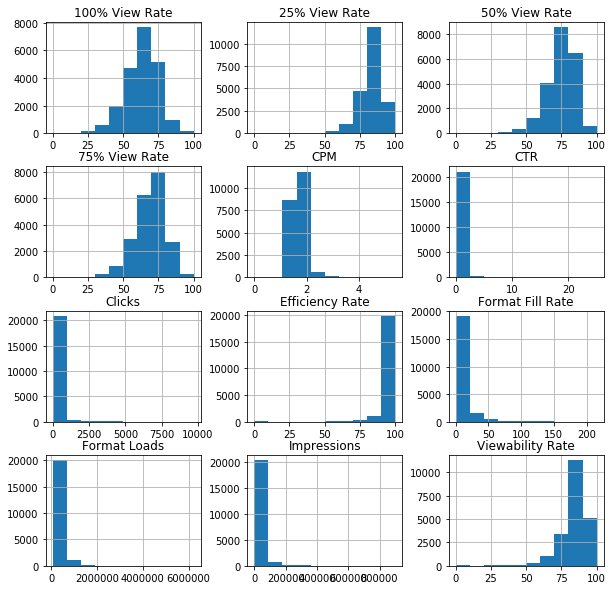

In [19]:
plt.rcParams['figure.figsize']=(10,10)
report.hist();

Reordering of the table grouping by Domain, ordered by the number of Format Loads

In [21]:
groupby_domains = report.groupby(['Domain']).agg({'Format Loads':np.sum,
                                'Impressions':np.sum,
                                'Format Fill Rate':np.mean,
                                'Viewability Rate':np.mean,
                                'Efficiency Rate':np.mean,
                                'CPM':np.mean,
                                'Clicks':np.sum,
                                'CTR':np.mean,
                                '25% View Rate':np.mean,
                                '50% View Rate':np.mean,
                                '75% View Rate':np.mean,
                                '100% View Rate':np.mean
                                }).sort_values( by= 'Format Loads',ascending=False).reset_index()
print(groupby_domains.shape)
groupby_domains.head(10)

(540, 13)


,Domain,Format Loads,Impressions,Format Fill Rate,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate
0,rediff.com,97496012.0,9816423,11.468696,76.979457,98.149565,1.674130,36582,36.37,71.908587,59.999565,52.975000,47.585761
1,missyusa.com,97473418.0,6128716,7.545385,75.436538,95.649231,1.621923,5167,2.32,73.578462,60.050769,50.964615,43.687308
2,mundopositivo.com.br,94053928.0,2171544,2.446739,69.167391,99.418261,1.812391,352,2.09,84.740978,87.405652,85.409674,81.476522
3,chinatimes.com,87913744.0,17022099,19.283913,88.242065,99.628478,1.762065,160360,83.92,79.241304,69.383478,62.438043,56.185978
4,correiobraziliense.com.br,77352838.0,12626361,17.077391,77.046196,99.761630,1.659674,54502,45.22,83.972065,78.116957,73.168913,67.466413
5,record.com.mx,77032297.0,2597030,3.459130,78.972717,98.311630,1.673913,14461,50.68,81.940761,72.612826,66.146957,60.511196
6,minuto30.com,74392564.0,2723644,3.812065,88.295217,97.986957,1.884022,21763,74.37,86.686413,80.279565,73.969891,67.519239
7,laverdadnoticias.com,72515627.0,14720666,20.368152,86.807391,98.802391,1.592065,258733,167.01,87.420543,82.891957,78.304565,73.296087
8,jugantor.com,67253114.0,1818818,2.800543,86.946957,98.541848,1.695435,6239,30.41,84.667065,76.732391,70.426522,64.551413
9,cooperativa.cl,63638868.0,2898818,4.795543,81.004891,98.348043,1.544783,32001,95.33,76.144674,65.132065,57.795217,51.657826


In [22]:
groupby_domains.groupby(['Domain','Format Fill Rate']).sum().sort_values( by= 'Format Fill Rate',ascending=False).reset_index().head(10)

,Domain,Format Fill Rate,Format Loads,Impressions,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate
0,minhavida.com.br,78.904719,23052587.0,17784650,87.762360,99.960337,1.672584,94614,49.51,86.564607,80.878315,76.575056,71.737303
1,designyoutrust.com,66.183333,937363.0,630318,89.773333,95.750000,1.704444,3047,4.61,82.690000,74.924444,70.047778,66.112222
2,kino-teatr.ru,63.790000,128629.0,82049,88.800000,82.560000,0.100000,606,0.74,69.710000,54.470000,44.980000,38.050000
3,mundohispanico.com,63.057826,32670090.0,20907504,85.567609,99.251739,1.649022,143300,69.31,86.539457,79.436413,73.602500,68.429348
4,palmeirasonline.com,55.050000,377557.0,213202,84.434000,99.882000,1.578000,1585,3.27,90.210000,83.544000,77.698000,71.340000
5,finanzmarktwelt.de,52.748889,3470223.0,1853180,90.008333,98.741111,1.526389,9818,19.18,90.976667,84.915278,79.878611,74.590556
6,rd1.com.br,50.128372,5061358.0,2416369,87.640233,99.878372,1.565814,4154,8.99,88.243721,82.582791,77.779070,73.118837
7,ig.com.br,45.098913,31212625.0,8523511,75.011957,99.944891,2.000109,18875,22.02,91.181304,87.330000,83.106848,78.048043
8,tuvideopr.com,44.831364,2467038.0,1064504,96.413636,99.008636,1.589091,20887,44.81,90.841818,85.883636,80.882273,76.641818
9,letras.mus.br,44.543696,41288918.0,16482504,78.817500,99.807609,1.824891,31895,17.29,88.150543,83.631739,79.971957,76.031739


(array([349., 118.,  35.,  18.,   8.,   5.,   3.,   1.,   2.,   1.]),
 array([ 0.        ,  7.89047191, 15.78094382, 23.67141573, 31.56188764,
        39.45235955, 47.34283146, 55.23330337, 63.12377528, 71.01424719,
        78.9047191 ]),
 <a list of 10 Patch objects>)

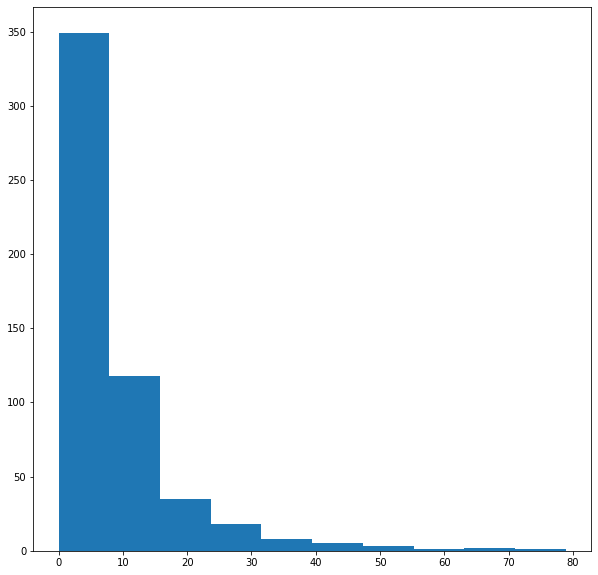

In [23]:
plt.hist(groupby_domains['Format Fill Rate'])

**We can see that around the 80% of the Domains have a Format Fill Rate percentage  between 0-15%**



## ADDING THE CATEGORY OF THE DOMAIN THROUGH A NEW TABLE

In [24]:
categories = pd.read_csv('Index Exchange Quality Inventory Mapping - Existing Acccount-Reseller-Domains - Compliance (1).csv')
categories.columns = ['Unnamed: 0', 'Partner/Seller Name', 'Partner/Seller ID',
       'Inventory Relationship\n(select from dropdown)', 'Domain',
       'Category', 'Monthly Volume', 'Ad Formats',
       'Banner/Player Dimensions']
categories.head(5)

,Unnamed: 0,Partner/Seller Name,Partner/Seller ID,Inventory Relationship\n(select from dropdown),Domain,Category,Monthly Volume,Ad Formats,Banner/Player Dimensions
0,NaN,Grupo LaRepublica,57044,Direct (working with the owner of the domain),larepublica.pe,News & Portals > Newspapers,73000000,Video,"640x360, 400x225"
1,NaN,Grupo RBS,53622,Direct (working with the owner of the domain),clicrbs.com.br,News & Portals > Newspapers,70000000,Video,"640x360, 400x225"
2,NaN,BioBioChile,54601,Direct (working with the owner of the domain),biobiochile.cl,News & Portals > Newspapers,69000000,Video,"640x360, 400x225"
3,NaN,Studiosol,53903,Direct (working with the owner of the domain),cifraclub.com.br,Music & Radio > General,66000000,Video,"640x360, 400x225"
4,NaN,Webedia,47119,Direct (working with the owner of the domain),purepeople.com.br,Glamour > Beauty,60000000,Video,"640x360, 400x225"


In [25]:
categories.columns

Index(['Unnamed: 0', 'Partner/Seller Name', 'Partner/Seller ID',
       'Inventory Relationship\n(select from dropdown)', 'Domain', 'Category',
       'Monthly Volume', 'Ad Formats', 'Banner/Player Dimensions'],
      dtype='object')

In [26]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     0 non-null      float64
 1   Partner/Seller Name                            756 non-null    object 
 2   Partner/Seller ID                              756 non-null    int64  
 3   Inventory Relationship
(select from dropdown)  756 non-null    object 
 4   Domain                                         756 non-null    object 
 5   Category                                       756 non-null    object 
 6   Monthly Volume                                 756 non-null    int64  
 7   Ad Formats                                     756 non-null    object 
 8   Banner/Player Dimensions                       756 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 53.3+ 

In [27]:
categories.columns

Index(['Unnamed: 0', 'Partner/Seller Name', 'Partner/Seller ID',
       'Inventory Relationship\n(select from dropdown)', 'Domain', 'Category',
       'Monthly Volume', 'Ad Formats', 'Banner/Player Dimensions'],
      dtype='object')

In [28]:
print(len(categories['Category'].unique()), 'categories:')
categories['Category'].unique()


52 categories:


array(['News & Portals > Newspapers', 'Music & Radio > General',
       'Glamour > Beauty', 'Food > Cooking & Baking',
       'Sports > News & Scores', 'Music & Radio > Lyrics',
       'Health & Wellness > Fitness', 'Community & Culture > General',
       'News & Portals > Television Stations',
       'Movies & Television > Television', 'Sports > Football',
       'Glamour > Celebrities', 'Education & Careers > Careers & Jobs',
       'Movies & Television > Movies', 'Health & Wellness > Reference',
       'Money & Investing > Investing', 'B-to-B > Business News',
       'Education & Careers > Science & Technology',
       'Leisure > Astrology', 'Home > General',
       'Community & Culture > Humor & Entertainment',
       'Education & Careers > K-12', 'Tech & Gaming > Tech News',
       'Tech & Gaming > Console Games', 'Glamour > Women',
       'Family & Parenting > Parenting', 'Music & Radio > Songs & Videos',
       'News & Portals > News & Commentary', 'Casual Games > Sweepstakes',


- In order to reduce the number of categories, I´m going to keep the general category only, and not the specific one

In [29]:
import re
pattern = '>'
renamed_categories = []
for string in categories['Category']:
    text = string
    match = re.search(pattern, text)
    s = match.start()
    renamed_categories.append(string[:s])
categories['Category'] = categories['Category'].replace(categories['Category'].values, renamed_categories )

In [30]:
categories.head(5)

,Unnamed: 0,Partner/Seller Name,Partner/Seller ID,Inventory Relationship\n(select from dropdown),Domain,Category,Monthly Volume,Ad Formats,Banner/Player Dimensions
0,NaN,Grupo LaRepublica,57044,Direct (working with the owner of the domain),larepublica.pe,News & Portals,73000000,Video,"640x360, 400x225"
1,NaN,Grupo RBS,53622,Direct (working with the owner of the domain),clicrbs.com.br,News & Portals,70000000,Video,"640x360, 400x225"
2,NaN,BioBioChile,54601,Direct (working with the owner of the domain),biobiochile.cl,News & Portals,69000000,Video,"640x360, 400x225"
3,NaN,Studiosol,53903,Direct (working with the owner of the domain),cifraclub.com.br,Music & Radio,66000000,Video,"640x360, 400x225"
4,NaN,Webedia,47119,Direct (working with the owner of the domain),purepeople.com.br,Glamour,60000000,Video,"640x360, 400x225"


In [31]:
len(categories['Category'].unique())

19

In [32]:
categories['Category'].unique()

array(['News & Portals ', 'Music & Radio ', 'Glamour ', 'Food ',
       'Sports ', 'Health & Wellness ', 'Community & Culture ',
       'Movies & Television ', 'Education & Careers ',
       'Money & Investing ', 'B-to-B ', 'Leisure ', 'Home ',
       'Tech & Gaming ', 'Family & Parenting ', 'Casual Games ',
       'Travel ', 'Shopping ', 'Autos '], dtype=object)

- Now we have 19 categories

In [33]:
categories_importance = pd.DataFrame(categories.groupby('Category')['Monthly Volume'].sum().sort_values(ascending=False).reset_index())

total_formatloads = categories_importance['Monthly Volume'].sum()
categories_importance['Category importance'] = categories_importance['Monthly Volume'].apply(lambda x: x/total_formatloads)
categories_importance.head(5)

,Category,Monthly Volume,Category importance
0,News & Portals,2366000000,0.586079
1,Sports,308000000,0.076294
2,Community & Culture,267000000,0.066138
3,Music & Radio,227000000,0.056230
4,Glamour,192000000,0.047560


In [34]:
domains_categories_importance = categories.merge(categories_importance, on='Category')
domains_categories_importance = domains_categories_importance[['Domain','Category','Category importance']]
domains_categories_importance.head(5) 


,Domain,Category,Category importance
0,larepublica.pe,News & Portals,0.586079
1,clicrbs.com.br,News & Portals,0.586079
2,biobiochile.cl,News & Portals,0.586079
3,laverdadnoticias.com,News & Portals,0.586079
4,cooperativa.cl,News & Portals,0.586079


- Merging the categories with the main DataFrames

In [59]:
report = report.merge(domains_categories_importance, on='Domain', how='left')
display(report.head(5))
report.isnull().sum()

,Time,Domain,Format Loads,Format Fill Rate,Impressions,Viewability Rate,Efficiency Rate,CPM,Cost,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate,Category,Category importance
0,2020-01-01,game24h.vn,514886.0,0.00,20,100.00,100.00,3.80,0.053130,0,0.00,65.00,60.00,50.00,45.00,NaN,NaN
1,2020-01-01,bestie.vn,87548.0,0.94,823,87.70,92.68,1.74,0.573932,0,0.00,92.10,87.97,84.45,82.26,Community & Culture,0.066138
2,2020-01-01,behindwoods.com,221308.0,5.03,11138,83.07,98.63,1.55,8.607510,114,1.02,75.97,64.73,56.30,48.81,Community & Culture,0.066138
3,2020-01-01,vanguardia.com,122442.0,2.09,2563,87.20,98.77,1.68,1.719096,22,0.86,85.02,76.79,69.76,64.49,News & Portals,0.586079
4,2020-01-01,fmdos.cl,201116.0,5.23,10526,85.04,99.88,1.54,6.488323,239,2.27,80.17,68.21,60.04,55.01,Glamour,0.047560


Time                      0
Domain                    0
Format Loads              0
Format Fill Rate          0
Impressions               0
Viewability Rate          0
Efficiency Rate           0
CPM                       0
Cost                      0
Clicks                    0
CTR                       0
25% View Rate             0
50% View Rate             0
75% View Rate             0
100% View Rate            0
Category               4931
Category importance    4931
dtype: int64

In [60]:
report.shape

(21567, 17)

In [61]:
groupby_domains = groupby_domains.merge(domains_categories_importance, on='Domain', how ='left')
display(groupby_domains.head(5))
groupby_domains.isnull().sum()

,Domain,Format Loads,Impressions,Format Fill Rate,Viewability Rate,Efficiency Rate,CPM,Cost,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate,Category,Category importance
0,rediff.com,97496012.0,9816423,11.468696,76.979457,98.149565,1.674130,75.019861,36582,36.37,71.908587,59.999565,52.975000,47.585761,News & Portals,0.586079
1,missyusa.com,97473418.0,6128716,7.545385,75.436538,95.649231,1.621923,348.312388,5167,2.32,73.578462,60.050769,50.964615,43.687308,News & Portals,0.586079
2,mundopositivo.com.br,94053928.0,2171544,2.446739,69.167391,99.418261,1.812391,19.303819,352,2.09,84.740978,87.405652,85.409674,81.476522,Community & Culture,0.066138
3,chinatimes.com,87913744.0,17022099,19.283913,88.242065,99.628478,1.762065,129.135660,160360,83.92,79.241304,69.383478,62.438043,56.185978,News & Portals,0.586079
4,correiobraziliense.com.br,77352838.0,12626361,17.077391,77.046196,99.761630,1.659674,90.970322,54502,45.22,83.972065,78.116957,73.168913,67.466413,News & Portals,0.586079


Domain                   0
Format Loads             0
Impressions              0
Format Fill Rate         0
Viewability Rate         0
Efficiency Rate          0
CPM                      0
Cost                     0
Clicks                   0
CTR                      0
25% View Rate            0
50% View Rate            0
75% View Rate            0
100% View Rate           0
Category               170
Category importance    170
dtype: int64

In [62]:
groupby_domains.shape

(542, 16)

In [63]:
groupby_domains['Category'].value_counts().head(5)

News & Portals          219
Community & Culture      32
Sports                   25
Movies & Television      15
Tech & Gaming            14
Name: Category, dtype: int64

- We have to deal with the new NANS appeared with the merging oh the categories importance DataFrame. Let´s create a new DataFrame with only the rows with NAN category to analyze if this domains are relevant, and decide if we can drop them or we should keep them.

In [64]:
groupby_domains_NANs = groupby_domains[groupby_domains['Category'].isnull()]
display(groupby_domains_NANs.shape)

(170, 16)

In [67]:
groupby_domains_NANs.to_csv('groupby_domains_170NANs.csv')

### In effect, the Domains without the category are not necessarily irrelevant, around 50% of these Domains have more than 1 million of Format Loads, so I´m gonna manually complete the 170 Domains without category to have this column fill

In [35]:
groupby_domains_NANs_corrected = pd.read_csv('groupby_domains_170NANs_corrected.csv')
groupby_domains_NANs_corrected.head()

,Unnamed: 0,Domain,Category
0,0,jugantor.com,News & Portals
1,1,ask.fm,News & Portals
2,2,pikio.pl,News & Portals
3,3,listindiario.com,News & Portals
4,4,botasot.info,News & Portals


In [36]:
groupby_domains_NANs_corrected = groupby_domains_NANs_corrected.merge(categories_importance, on='Category')
groupby_domains_NANs_corrected = groupby_domains_NANs_corrected[['Domain','Category','Category importance']]
groupby_domains_NANs_corrected.head(5) 

,Domain,Category,Category importance
0,jugantor.com,News & Portals,0.586079
1,ask.fm,News & Portals,0.586079
2,pikio.pl,News & Portals,0.586079
3,listindiario.com,News & Portals,0.586079
4,botasot.info,News & Portals,0.586079


- Merging the groupby_domains_NANs_corrected dataframe with the domains_categories_importance in order to have all the domain correctly classified

In [37]:
categories_by_importance_complete = pd.concat([domains_categories_importance, groupby_domains_NANs_corrected])
categories_by_importance_complete.shape

(923, 3)

- Now I can merge the categories with the main dataframes, this time with all the domain ´s categories added

In [38]:
report = report.merge(categories_by_importance_complete, on='Domain', how='left')
display(report.head(5))
report.isnull().sum()

,Time,Domain,Format Loads,Format Fill Rate,Impressions,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate,Category,Category importance
0,2020-01-01,game24h.vn,514886.0,0.00,20,100.00,100.00,3.80,0,0.00,65.00,60.00,50.00,45.00,Tech & Gaming,0.019817
1,2020-01-01,bestie.vn,87548.0,0.94,823,87.70,92.68,1.74,0,0.00,92.10,87.97,84.45,82.26,Community & Culture,0.066138
2,2020-01-01,behindwoods.com,221308.0,5.03,11138,83.07,98.63,1.55,114,1.02,75.97,64.73,56.30,48.81,Community & Culture,0.066138
3,2020-01-01,vanguardia.com,122442.0,2.09,2563,87.20,98.77,1.68,22,0.86,85.02,76.79,69.76,64.49,News & Portals,0.586079
4,2020-01-01,fmdos.cl,201116.0,5.23,10526,85.04,99.88,1.54,239,2.27,80.17,68.21,60.04,55.01,Glamour,0.047560


Time                    0
Domain                  0
Format Loads            0
Format Fill Rate        0
Impressions             0
Viewability Rate        0
Efficiency Rate         0
CPM                     0
Clicks                  0
CTR                     0
25% View Rate           0
50% View Rate           0
75% View Rate           0
100% View Rate          0
Category               35
Category importance    35
dtype: int64

In [39]:
groupby_domains = groupby_domains.merge(categories_by_importance_complete, on='Domain', how ='left')
display(groupby_domains.head(5))
groupby_domains.isnull().sum()

,Domain,Format Loads,Impressions,Format Fill Rate,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate,Category,Category importance
0,rediff.com,97496012.0,9816423,11.468696,76.979457,98.149565,1.674130,36582,36.37,71.908587,59.999565,52.975000,47.585761,News & Portals,0.586079
1,missyusa.com,97473418.0,6128716,7.545385,75.436538,95.649231,1.621923,5167,2.32,73.578462,60.050769,50.964615,43.687308,News & Portals,0.586079
2,mundopositivo.com.br,94053928.0,2171544,2.446739,69.167391,99.418261,1.812391,352,2.09,84.740978,87.405652,85.409674,81.476522,Community & Culture,0.066138
3,chinatimes.com,87913744.0,17022099,19.283913,88.242065,99.628478,1.762065,160360,83.92,79.241304,69.383478,62.438043,56.185978,News & Portals,0.586079
4,correiobraziliense.com.br,77352838.0,12626361,17.077391,77.046196,99.761630,1.659674,54502,45.22,83.972065,78.116957,73.168913,67.466413,News & Portals,0.586079


Domain                 0
Format Loads           0
Impressions            0
Format Fill Rate       0
Viewability Rate       0
Efficiency Rate        0
CPM                    0
Clicks                 0
CTR                    0
25% View Rate          0
50% View Rate          0
75% View Rate          0
100% View Rate         0
Category               3
Category importance    3
dtype: int64

In [40]:
report['Domain'].value_counts()

elespanol.com                276
correiobraziliense.com.br     92
rediff.com                    92
minuto30.com                  92
diarioshow.com                92
                            ... 
jornalcontabil.com.br          1
kino-teatr.ru                  1
alertabogota.com               1
publimetro.com.mx              1
cn7.com.br                     1
Name: Domain, Length: 540, dtype: int64

- There are still 3 Domain with NaN Category, I added the categories for theses domains  but for some reason these categories haven´t been detected.

- For the moment I´m gonna save the 2 Dataframes modified in order to start working from this point

In [41]:
report.to_csv('report_Jan_to_April.csv')
groupby_domains.to_csv('groupby_domains_Jan_to_April.csv')

# ADDING NEW VARIABLES

In [18]:
report = pd.read_csv('report_Jan_to_April.csv',index_col =['Time'])
groupby_domains = pd.read_csv('groupby_domains_Jan_to_April.csv')
groupby_domains.drop('Unnamed: 0', 1, inplace = True)

In [19]:
groupby_domains.isin([0]).sum()

Domain                  0
Format Loads            0
Impressions             0
Format Fill Rate        3
Viewability Rate        0
Efficiency Rate         0
CPM                     0
Clicks                 13
CTR                    13
25% View Rate           0
50% View Rate           0
75% View Rate           0
100% View Rate          0
Category                0
Category importance     0
dtype: int64

In [6]:
display(report.head(5))
display(groupby_domains.head(5))

,Unnamed: 0,Domain,Format Loads,Format Fill Rate,Impressions,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate,Category,Category importance
Time,,,,,,,,,,,,,,,,
2020-01-01,0,game24h.vn,514886.0,0.00,20,100.00,100.00,3.80,0,0.00,65.00,60.00,50.00,45.00,Tech & Gaming,0.019817
2020-01-01,1,bestie.vn,87548.0,0.94,823,87.70,92.68,1.74,0,0.00,92.10,87.97,84.45,82.26,Community & Culture,0.066138
2020-01-01,2,behindwoods.com,221308.0,5.03,11138,83.07,98.63,1.55,114,1.02,75.97,64.73,56.30,48.81,Community & Culture,0.066138
2020-01-01,3,vanguardia.com,122442.0,2.09,2563,87.20,98.77,1.68,22,0.86,85.02,76.79,69.76,64.49,News & Portals,0.586079
2020-01-01,4,fmdos.cl,201116.0,5.23,10526,85.04,99.88,1.54,239,2.27,80.17,68.21,60.04,55.01,Glamour,0.047560


,Domain,Format Loads,Impressions,Format Fill Rate,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate,Category,Category importance
0,rediff.com,97496012.0,9816423,11.468696,76.979457,98.149565,1.674130,36582,36.37,71.908587,59.999565,52.975000,47.585761,News & Portals,0.586079
1,missyusa.com,97473418.0,6128716,7.545385,75.436538,95.649231,1.621923,5167,2.32,73.578462,60.050769,50.964615,43.687308,News & Portals,0.586079
2,mundopositivo.com.br,94053928.0,2171544,2.446739,69.167391,99.418261,1.812391,352,2.09,84.740978,87.405652,85.409674,81.476522,Community & Culture,0.066138
3,chinatimes.com,87913744.0,17022099,19.283913,88.242065,99.628478,1.762065,160360,83.92,79.241304,69.383478,62.438043,56.185978,News & Portals,0.586079
4,correiobraziliense.com.br,77352838.0,12626361,17.077391,77.046196,99.761630,1.659674,54502,45.22,83.972065,78.116957,73.168913,67.466413,News & Portals,0.586079


Relative frequences of the categories: 

In [7]:
groupby_domains.groupby('Category')['Format Loads'].sum()/groupby_domains['Format Loads'].sum()

Category
Autos                   0.003618
B-to-B                  0.006256
Casual Games            0.011673
Community & Culture     0.070594
Education & Careers     0.019036
Family & Parenting      0.003158
Food                    0.006565
Glamour                 0.045803
Health & Wellness       0.020524
Home                    0.001752
Leisure                 0.001088
Money & Investing       0.017465
Movies & Television     0.017978
Music & Radio           0.022481
News & Portals          0.655753
Shopping                0.004013
Sports                  0.061483
Tech & Gaming           0.030181
Travel                  0.000013
Name: Format Loads, dtype: float64

We can see that tere are not big differences comparing with the first time we calculate this, before modifying the NULL categories, so for the moment we are going to work with the column that I already had

### Adding a new variable that tell us if it´s a recurrent Domain (if it´s available more than 50% of the days)

In [8]:
#New DataFrame with the Domain and the recurrence:
recurrence = pd.DataFrame(report['Domain'].value_counts()).reset_index()
recurrence.columns = ['Domain', 'Recurrence']

#Adding the bynary column: 1 means that the Domain is available more than the 50% of the days:
recurrence['Domain Recurrence'] = list(map(lambda x: 1 if x>45 else 0 ,recurrence['Recurrence']))
recurrence = recurrence[['Domain', 'Domain Recurrence']]
recurrence = recurrence[recurrence['Domain Recurrence']==1] #I only keep the recurrent domains

#Adding the Domain Recurrence column to the main Dataframes
report['Domain Recurrence'] = report['Domain'].isin(recurrence['Domain'])
report['Domain Recurrence']= report['Domain Recurrence'].replace({True:1,False:0}) 

groupby_domains['Domain Recurrence'] = groupby_domains['Domain'].isin(recurrence['Domain'])
groupby_domains['Domain Recurrence']= groupby_domains['Domain Recurrence'].replace({True:1,False:0}) 


## RELATIONSHIP BETWEEN VARIABLES

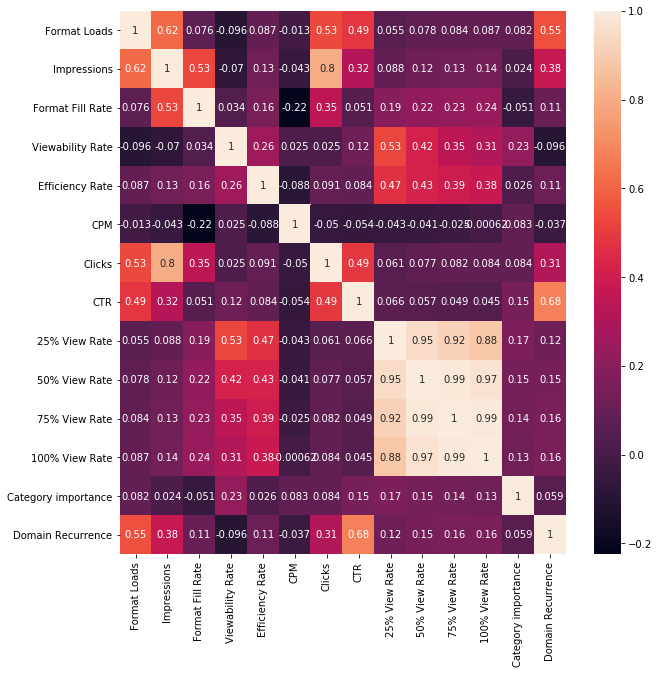

In [46]:
sns.heatmap(groupby_domains.corr(), annot = True)

### UNDERSTANDING THE DATA WITH GRAPHS

In [47]:
plt.rcParams['figure.figsize']=(10,10)


### General shape of the Format Loads and Impressions over the 3 months:

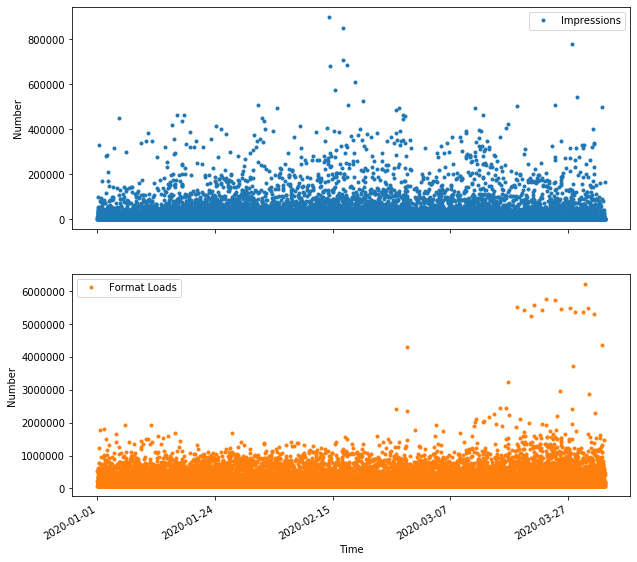

In [48]:
col_graf = ['Impressions', 'Format Loads'] 
ejes = report[col_graf].plot(marker='.', linestyle='None',figsize=(10,10),subplots=True)
for eje in ejes:
  eje.set_ylabel('Number')

### Distribution of the categories

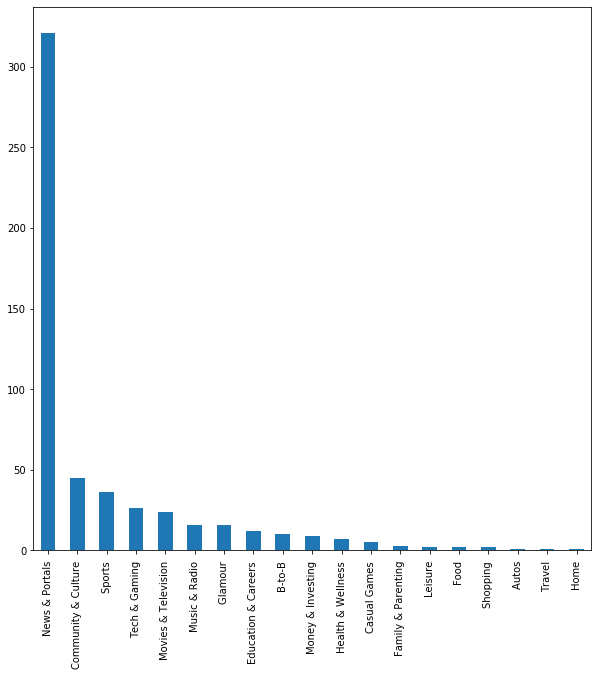

In [49]:
categories=groupby_domains['Category'].value_counts()
categories.plot(kind='bar');

### Impressions evolution through the three months

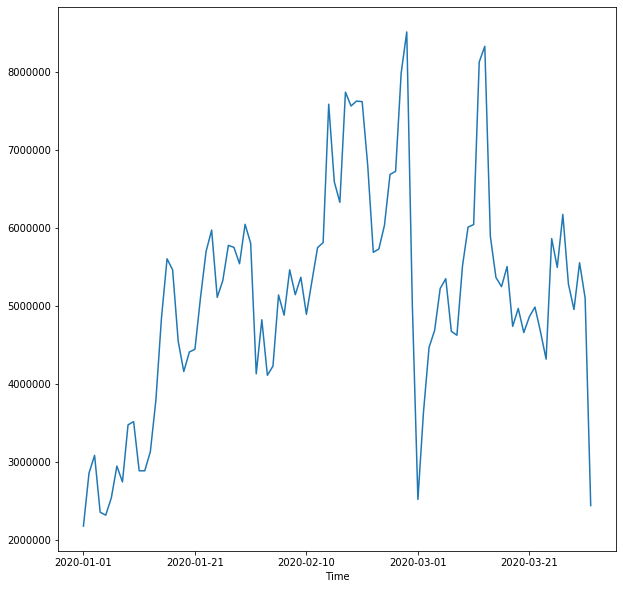

In [50]:
report.groupby(report.index)['Impressions'].sum().plot(kind='line', rot = 0)

### Number of recurrent Domains

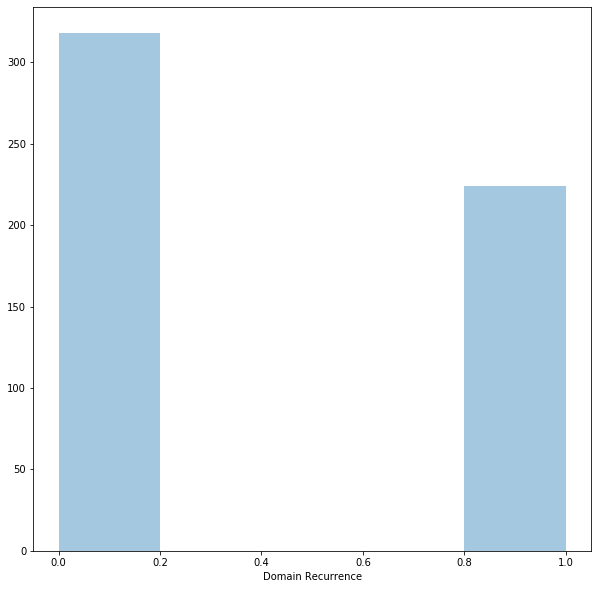

In [51]:
sns.distplot(groupby_domains['Domain Recurrence'], kde = False);

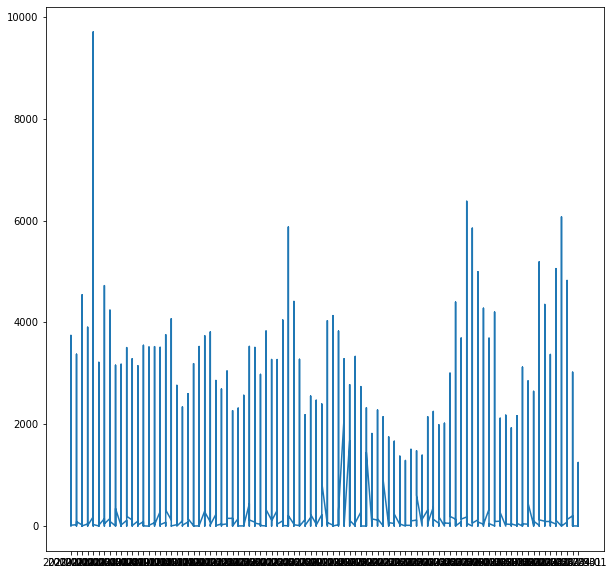

In [52]:
plt.plot(report.Clicks)

In [242]:
report = report.reset_index()

In [53]:
ffr_bycategories = pd.DataFrame(report.groupby(['Time', 'Category'])['Format Fill Rate'].mean()).reset_index()

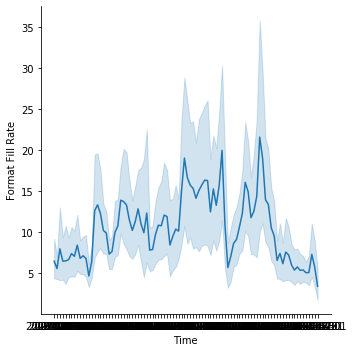

In [54]:
sns.relplot(x="Time", y='Format Fill Rate', kind="line", data=ffr_bycategories)